In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
data = pd.read_csv('../../data/star_classification.csv')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
# Counting up the number of tag occurences in class column
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [4]:
class_frequency = data['class'].map(len)
class_frequency

0        6
1        6
2        6
3        6
4        6
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: class, Length: 100000, dtype: int64

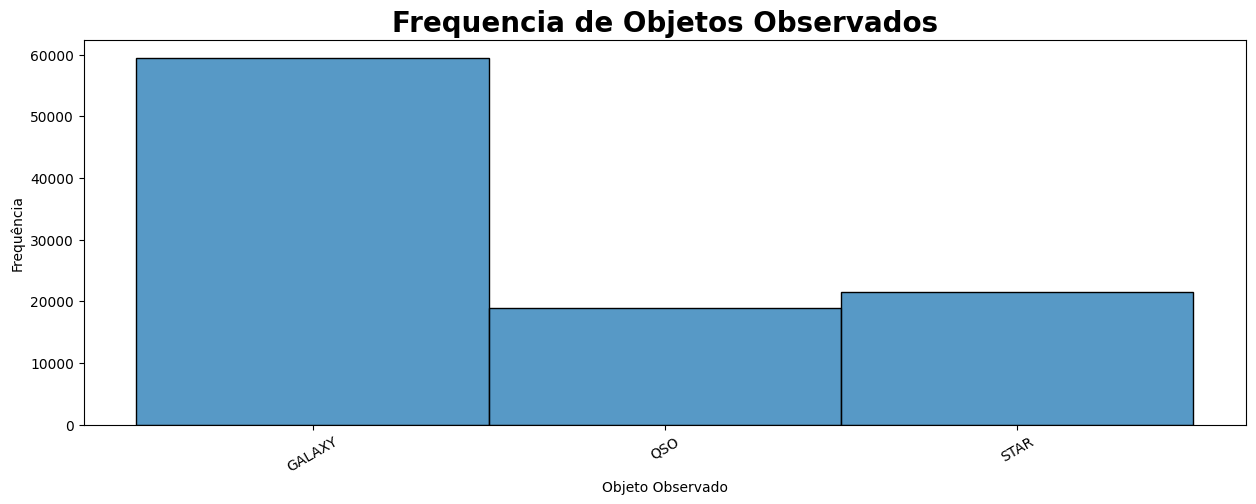

In [5]:
plt.figure(figsize=(15, 5))
plt.title('Frequencia de Objetos Observados', fontsize=20, weight='bold')
sns.histplot(
    data=class_frequency,
    bins=class_frequency.nunique(),
    x= data['class']
)
plt.xticks(rotation=30)
plt.xlabel('Objeto Observado')
plt.ylabel('Frequência')
plt.show()

In [6]:
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [7]:
# from sklearn.preprocessing import LabelEncoder
# #creating labelEncoder
# le = LabelEncoder()
# #Converting string labels into numbers.
# data['class']=le.fit_transform(data['class'])
# data


In [8]:
#getting unique values for class column
data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [9]:
# Separating the data into features and target
X = data.drop('class', axis=1)
y = data['class'].apply(lambda x: 1 if x == 'STAR' else 0)


In [10]:
print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"=> Train size: {len(X_train)}\tTest size: {len(y_test)}")

=> Train size: 80000	Test size: 20000


In [12]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Applying PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
# Training the model
model = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

ValueError: The classes, [0, 1], are not in class_weight

In [28]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [29]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.42      0.53     11860
           1       0.34      0.64      0.44      3797
           2       0.38      0.53      0.44      4343

    accuracy                           0.49     20000
   macro avg       0.48      0.53      0.47     20000
weighted avg       0.58      0.49      0.50     20000



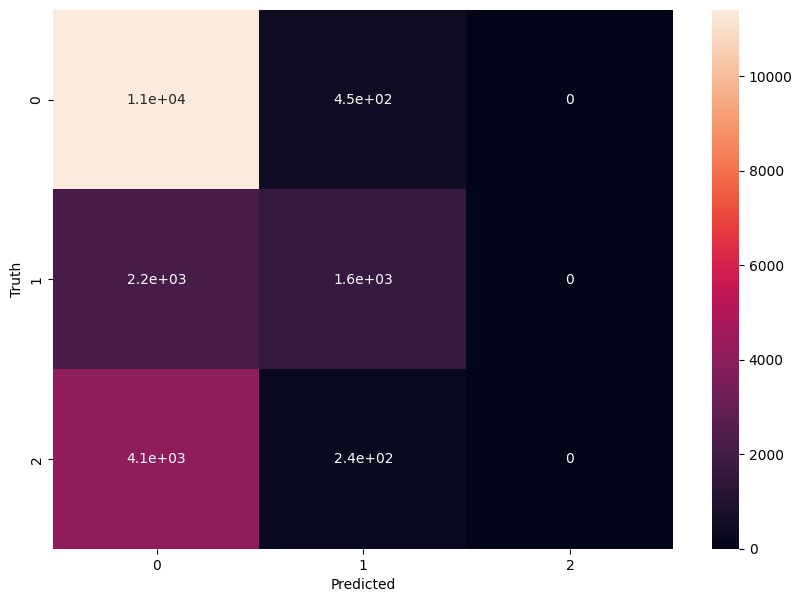

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

 ---> It is now clear that our class data is very imbalanced, therefore we must balance thing out so we can get a better performance from the model

 __*Finding the best weights for the imbalanced classes*__

In [16]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"=> Train size: {len(X_train_g)}\tTest size: {len(y_test_g)}")

=> Train size: 80000	Test size: 20000


In [18]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

model = SVC()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
randomsearch = RandomizedSearchCV(estimator = model, 
                          param_distributions = param_grid,
                          cv = StratifiedKFold(), 
                          n_jobs = -1, 
                          scoring = 'f1', 
                          verbose = 2).fit(X_train_g, y_train_g)

#Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({'score': randomsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)
best_weights = randomsearch.best_params_['class_weight']
best_weights

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END class_weight={0: 0.9651256281407036, 1: 0.03487437185929643}; total time= 3.1min
[CV] END class_weight={0: 0.9651256281407036, 1: 0.03487437185929643}; total time= 3.3min
[CV] END class_weight={0: 0.9651256281407036, 1: 0.03487437185929643}; total time= 3.4min
[CV] END class_weight={0: 0.9651256281407036, 1: 0.03487437185929643}; total time= 3.8min
[CV] END class_weight={0: 0.9352763819095478, 1: 0.06472361809045224}; total time= 3.8min
[CV] END class_weight={0: 0.9651256281407036, 1: 0.03487437185929643}; total time= 4.0min
[CV] END class_weight={0: 0.7412562814070351, 1: 0.25874371859296486}; total time= 4.1min
[CV] END class_weight={0: 0.7412562814070351, 1: 0.25874371859296486}; total time= 4.3min
[CV] END class_weight={0: 0.9352763819095478, 1: 0.06472361809045224}; total time= 4.4min
[CV] END class_weight={0: 0.7412562814070351, 1: 0.25874371859296486}; total time= 5.1min
[CV] END class_weight={0: 0.74125628140

{0: 0.26864321608040204, 1: 0.731356783919598}

In [24]:
best_weights = randomsearch.best_params_['class_weight']

In [25]:
best_weights

{0: 0.26864321608040204, 1: 0.731356783919598}

In [26]:
# Training the model
model = SVC(class_weight=best_weights, kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

SVC(class_weight={0: 0.26864321608040204, 1: 0.731356783919598})

In [27]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [28]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15692
           1       0.91      0.99      0.95      4308

    accuracy                           0.98     20000
   macro avg       0.95      0.98      0.97     20000
weighted avg       0.98      0.98      0.98     20000

